In [1]:
#importing necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Copy of HR Data.csv")

In [4]:
print("First Few rows of the dataset: ")
print(data.head())

First Few rows of the dataset: 
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardH

In [5]:
print("Summary Statistics of the Dataset")
print(data.describe())

Summary Statistics of the Dataset
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   

In [6]:
print("Missing Values in the Dataset")
print(data.isnull().sum())

Missing Values in the Dataset
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [7]:
data.dropna(inplace = True)

int64
[1 0]


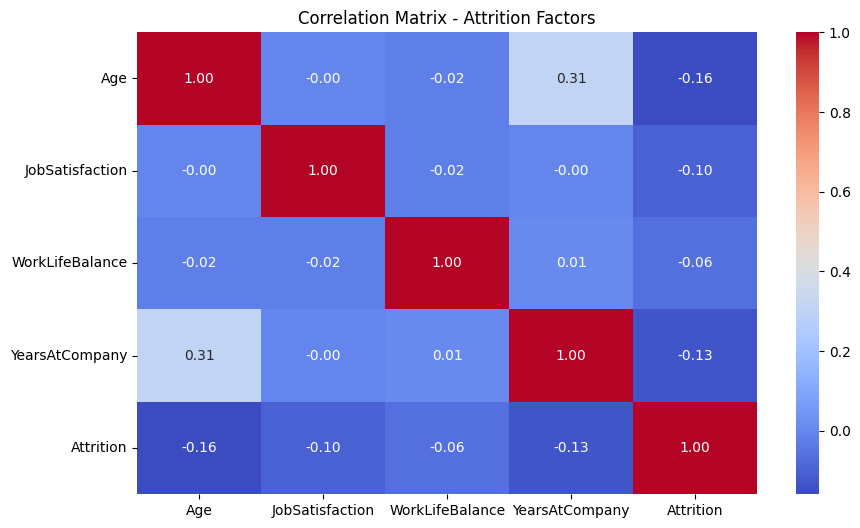

In [8]:
data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})
print(data['Attrition'].dtype)
print(data['Attrition'].unique())


attrition_factors = data[['Age','JobSatisfaction','WorkLifeBalance','YearsAtCompany','Attrition']]
attrition_corr = attrition_factors.corr()
plt.figure(figsize=(10,6))
sns.heatmap(attrition_corr, annot = True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix - Attrition Factors")
plt.show()

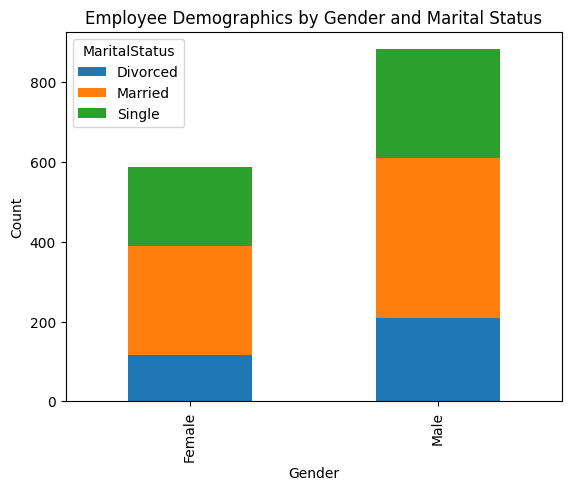

In [9]:
demographics = data[['Age','Gender','MaritalStatus','Education','EducationField']]
demographics_counts= demographics.groupby(['Gender','MaritalStatus']).size().unstack()
demographics_counts.plot(kind='bar',stacked ='True')
plt.title("Employee Demographics by Gender and Marital Status")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

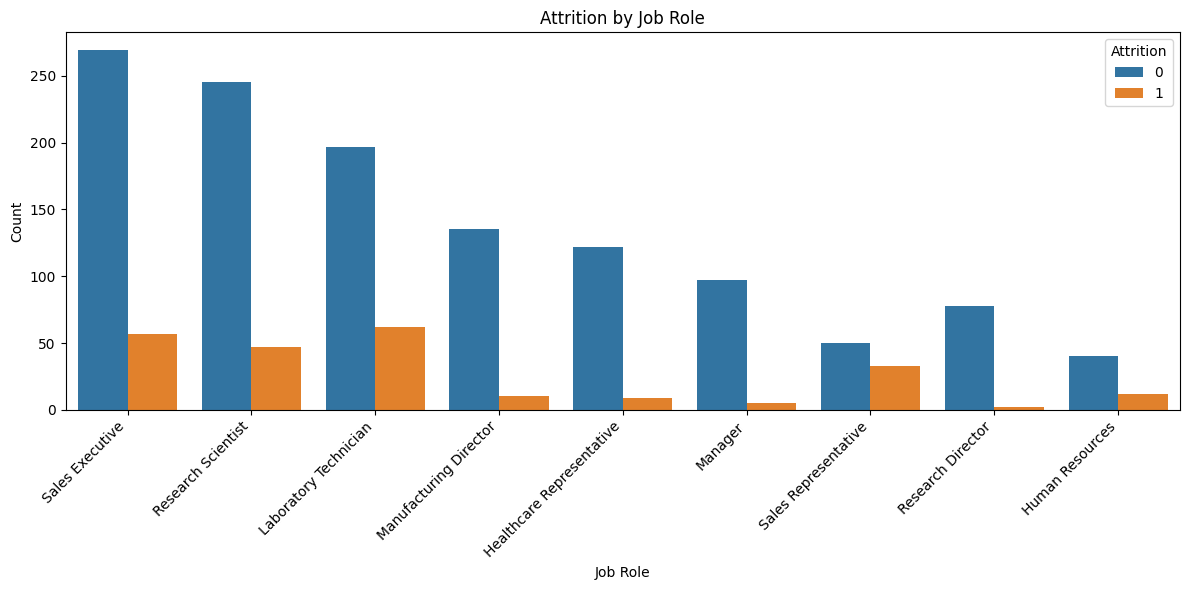

In [10]:
job_related = data[['JobRole','JobLevel','BusinessTravel','OverTime','JobInvolvement']]
plt.figure(figsize = (12,6))
sns.countplot(x='JobRole',hue = 'Attrition',data = data)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation = 45,ha = 'right')
plt.legend(title='Attrition',loc='upper right')
plt.tight_layout()
plt.show()

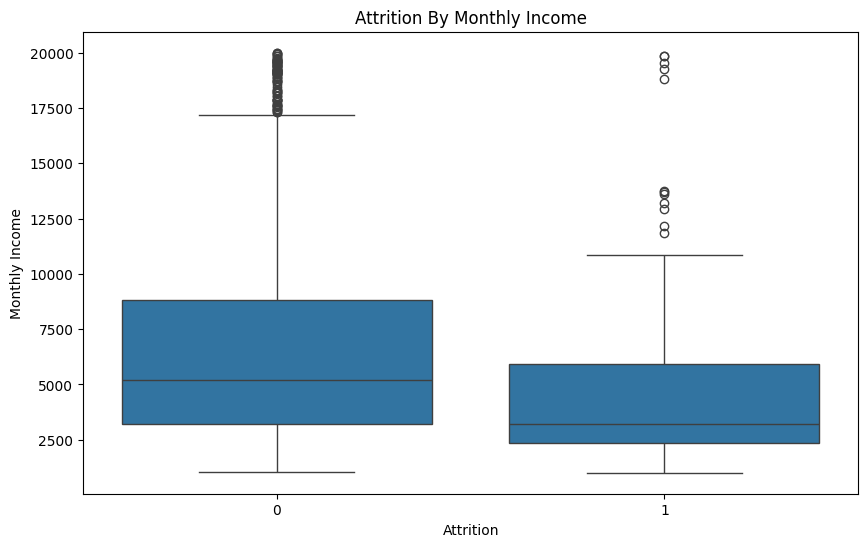

In [11]:
salary_comp = data[['MonthlyIncome','PerformanceRating','StockOptionLevel','Attrition']]
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition',y='MonthlyIncome',data=data)
plt.title("Attrition By Monthly Income")
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

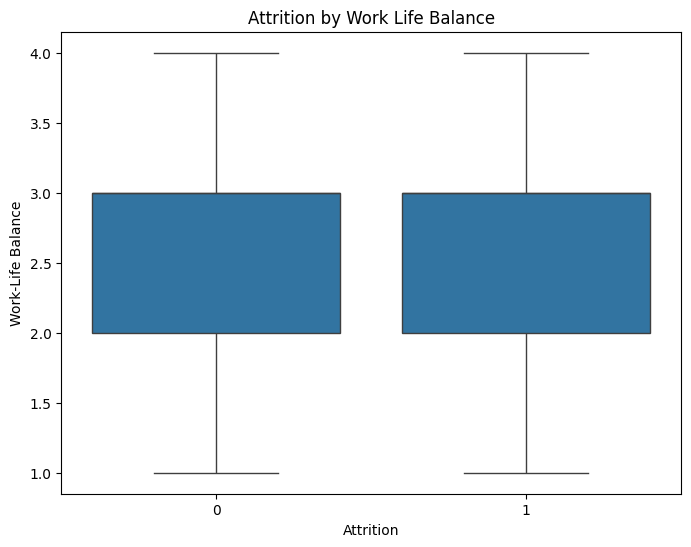

In [12]:
work_env = data[['Department','DistanceFromHome','WorkLifeBalance','Attrition']]
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition',y='WorkLifeBalance',data = data)
plt.title("Attrition by Work Life Balance")
plt.xlabel('Attrition')
plt.ylabel('Work-Life Balance')
plt.show()

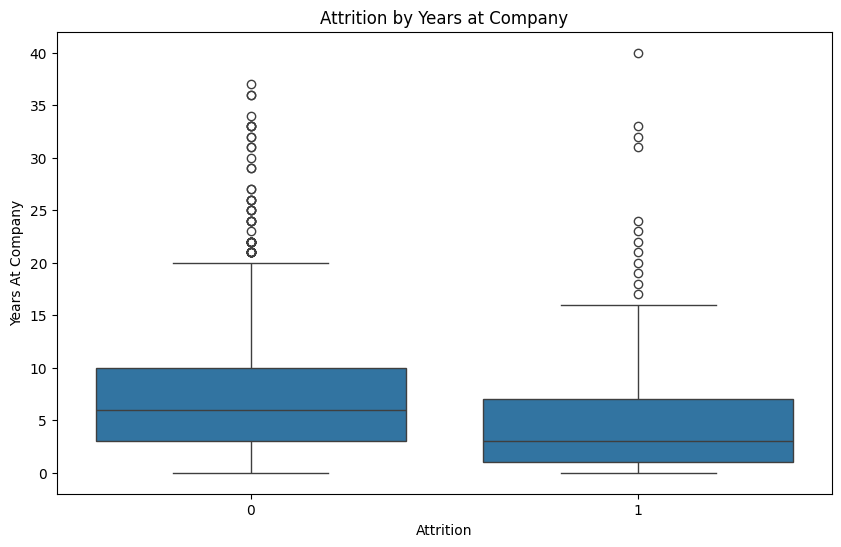

In [13]:
career_dev = data[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','TotalWorkingYears','Attrition']]
plt.figure(figsize =(10,6))
sns.boxplot(x='Attrition',y='YearsAtCompany',data=data)
plt.title("Attrition by Years at Company")
plt.xlabel('Attrition')
plt.ylabel('Years At Company')
plt.show()

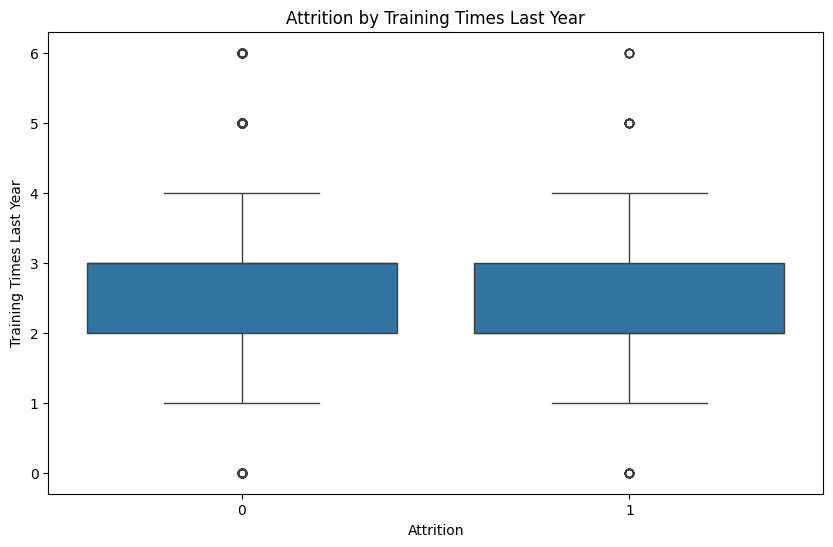

In [14]:
training_dev = data[['TrainingTimesLastYear','Education','Attrition']]
plt.figure(figsize =(10,6))
sns.boxplot(x='Attrition',y='TrainingTimesLastYear',data=data)
plt.title('Attrition by Training Times Last Year')
plt.xlabel('Attrition')
plt.ylabel('Training Times Last Year')
plt.show()

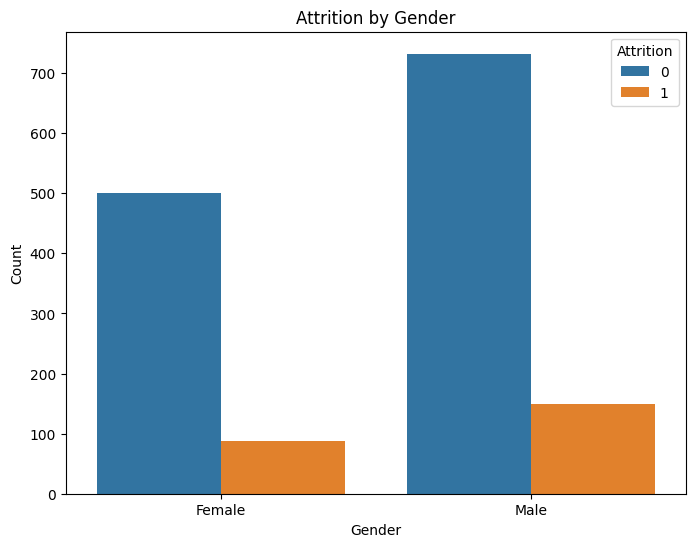

In [15]:
Gender_diversity = data[['Gender','Attrition']]
plt.figure(figsize =(8,6))
sns.countplot(x='Gender', hue='Attrition',data=data)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

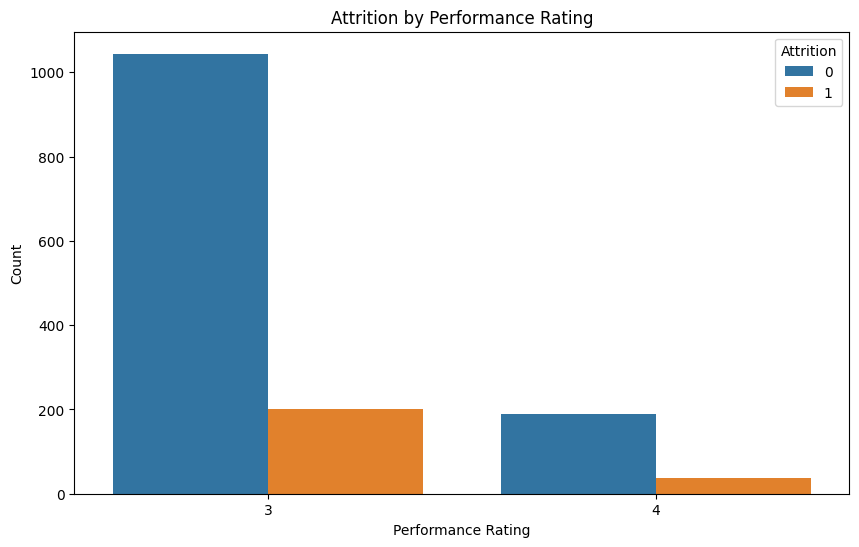

In [16]:
performance_job_factors = data[['PerformanceRating','JobRole','Attrition']]
plt.figure(figsize=(10,6))
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)
plt.title('Attrition by Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()

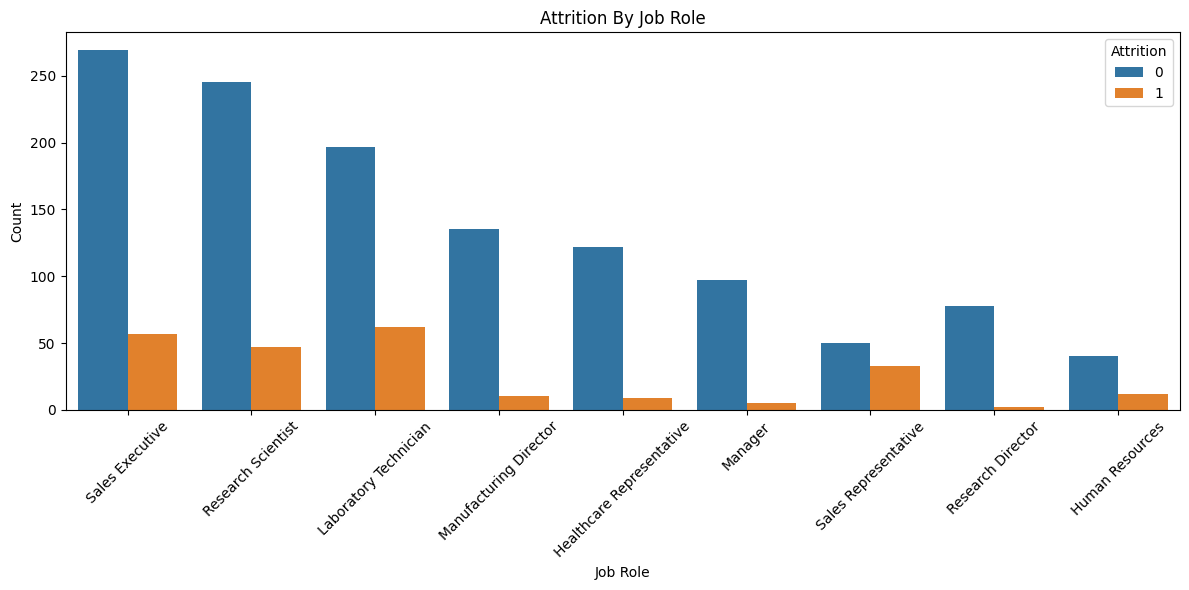

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole',hue='Attrition',data=data)
plt.title('Attrition By Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition',loc ='upper right')
plt.tight_layout()
plt.show()

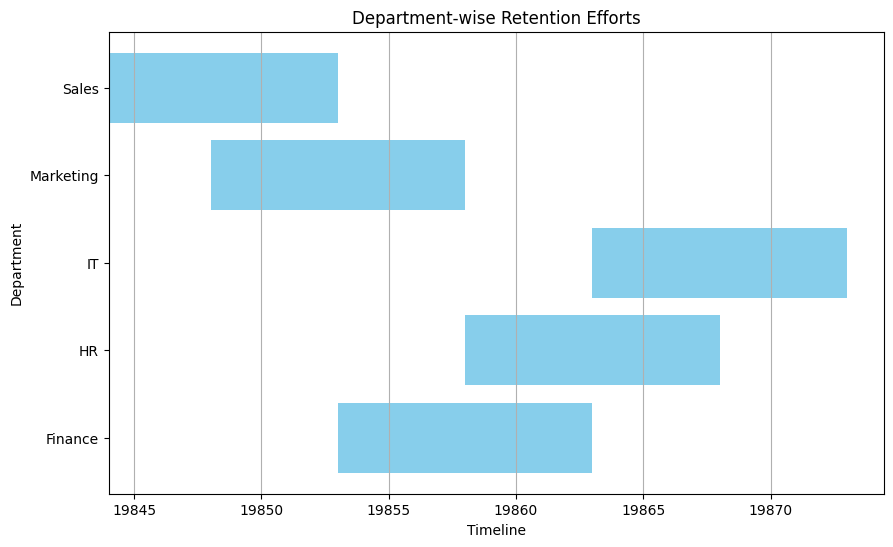

In [18]:
departments = ['Sales', 'Marketing', 'Finance', 'HR', 'IT']
start_dates = ['2024-05-01', '2024-05-05', '2024-05-10', '2024-05-15', '2024-05-20']
end_dates = ['2024-05-10', '2024-05-15', '2024-05-20', '2024-05-25', '2024-05-30']

# Convert dates to datetime objects
start_dates = pd.to_datetime(start_dates)
end_dates = pd.to_datetime(end_dates)

# Create a DataFrame
df = pd.DataFrame({'Department': departments, 'Start_Date': start_dates, 'End_Date': end_dates})

# Sort DataFrame by department
df = df.sort_values(by='Department')

# Plotting the Gantt chart
plt.figure(figsize=(10, 6))

for index, row in df.iterrows():
    plt.barh(y=row['Department'], left=row['Start_Date'], width=row['End_Date'] - row['Start_Date'], color='skyblue')
plt.xlabel('Timeline')
plt.ylabel('Department')
plt.title('Department-wise Retention Efforts')
plt.grid(axis='x')


plt.show()